In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score as R2,mean_absolute_error as MAE,mean_squared_error as MSE

In [ ]:
data=pd.read_csv('/content/mission_3.csv')
data.head(10)

,Brand,Model Year,Mileage (miles),Fuel Type,Condition,Transmission,Resale Price
0,Ford,2009,148946,Electric,2,Automatic,22570
1,BMW,2020,158471,Electric,3,Automatic,19312
2,Ford,2005,112450,Diesel,2,Automatic,14972
3,Honda,2013,117547,Gasoline,4,Manual,25714
4,Honda,2016,55108,Diesel,4,Automatic,21456
5,Ford,2008,187479,Diesel,5,Manual,28403
6,Toyota,2021,95272,Electric,3,Manual,16683
7,Ford,2016,49064,Gasoline,1,Manual,5627
8,Honda,2010,75271,Diesel,1,Automatic,4105
9,Honda,2005,117893,Diesel,4,Manual,11580


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Brand            1000 non-null   object
 1   Model Year       1000 non-null   int64 
 2   Mileage (miles)  1000 non-null   int64 
 3   Fuel Type        1000 non-null   object
 4   Condition        1000 non-null   int64 
 5   Transmission     1000 non-null   object
 6   Resale Price     1000 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 54.8+ KB


In [ ]:
data.columns

Index(['Brand', 'Model Year', 'Mileage (miles)', 'Fuel Type', 'Condition',
       'Transmission', 'Resale Price'],
      dtype='object')

In [ ]:
for i in data:
  print(data[i].unique())
  print("-----------")


['Ford' 'BMW' 'Honda' 'Toyota' 'Chevrolet']
-----------
[2009 2020 2005 2013 2016 2008 2021 2010 2003 2014 2002 2004 2011 2019
 2007 2001 2012 2006 2000 2015 2018]
-----------
[148946 158471 112450 117547  55108 187479  95272  49064  75271 117893
 131063  52254 108727 105689  26357  35306  82505  37711 122796 178714
 121336  94045 117296 125975 125885  25932 161256 176890 179088  99179
 182286  42504  90981 138272 101601  39698  10539  17183  43360  71690
  91202 144752 183047 129249 138883  44384 189423  16111  27671  54811
 122858 197339 111081 116472  34855  20151  20708   7869 197506 138121
  63871  56663 138983  96412 178179  43467  51843 138629 165371  61250
  85623   9499 167688 188155 196785  13155 133391  11295  28328  96906
 137874  64040  98384 112512 131071  89896 115078  26918 124121 152718
 197207  76295 140059  12400  39754  91416 117561 147483 152443 184426]
-----------
['Electric' 'Diesel' 'Gasoline']
-----------
[2 3 4 5 1]
-----------
['Automatic' 'Manual']
---------

In [ ]:
Le={}
LabelData=['Brand','Fuel Type','Transmission']
for En in LabelData:
  Le[En]=LabelEncoder()
  data[En]=Le[En].fit_transform(data[En])
print(Le)

{'Brand': LabelEncoder(), 'Fuel Type': LabelEncoder(), 'Transmission': LabelEncoder()}


In [ ]:
ScallerData=['Model Year','Mileage (miles)','Condition']
Min=MinMaxScaler()
data[ScallerData]=Min.fit_transform(data[ScallerData])
data.head(10)

,Brand,Model Year,Mileage (miles),Fuel Type,Condition,Transmission,Resale Price
0,2,0.428571,0.743932,1,0.25,0,22570
1,0,0.952381,0.794159,1,0.50,0,19312
2,2,0.238095,0.551480,0,0.25,0,14972
3,3,0.619048,0.578358,2,0.75,1,25714
4,3,0.761905,0.249102,0,0.75,0,21456
5,2,0.380952,0.947125,0,1.00,1,28403
6,4,1.000000,0.460896,1,0.50,1,16683
7,2,0.761905,0.217231,2,0.00,1,5627
8,3,0.476190,0.355426,0,0.00,0,4105
9,3,0.238095,0.580182,0,0.75,1,11580


In [ ]:
#HeatMap for Datacorr , HistGram for Price , ScatterPlot for Miles and Price , BarPlot for Brand and Price

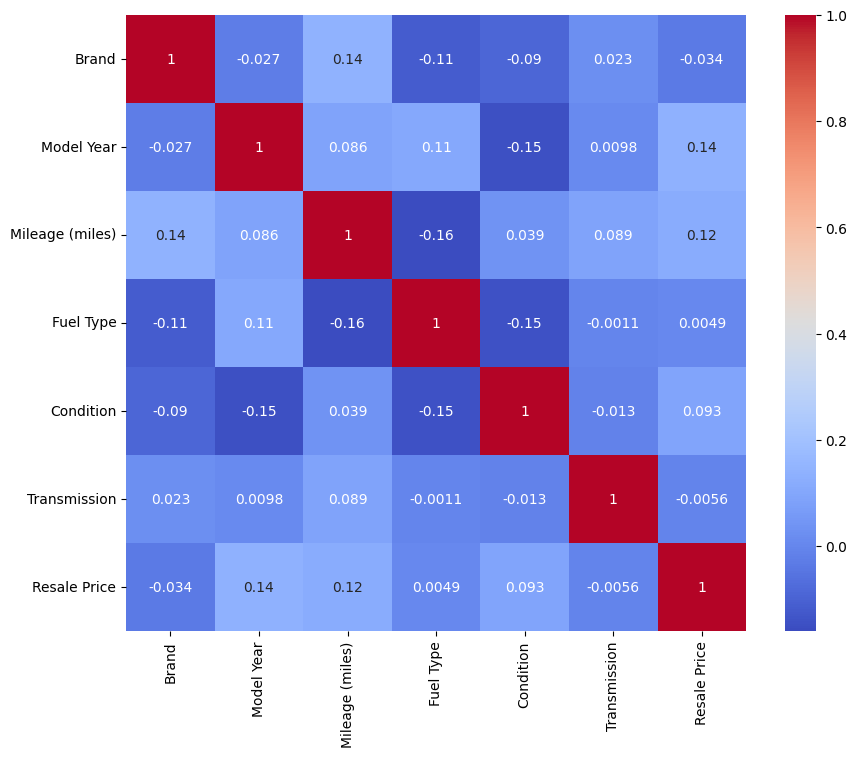

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr() ,annot=True,  cmap='coolwarm')
plt.title="HeatMap"
plt.show()

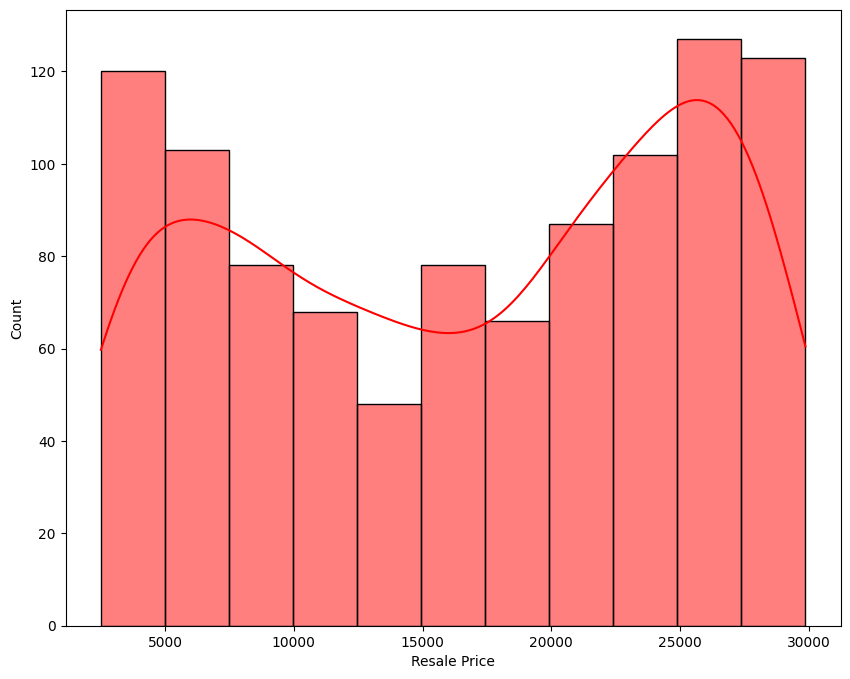

In [ ]:
plt.figure(figsize=(10,8))
sns.histplot(data['Resale Price'],kde=True,color="red")
plt.title='Price'
plt.xlabel='Price'
plt.ylabel='Frequancy'
plt.show()

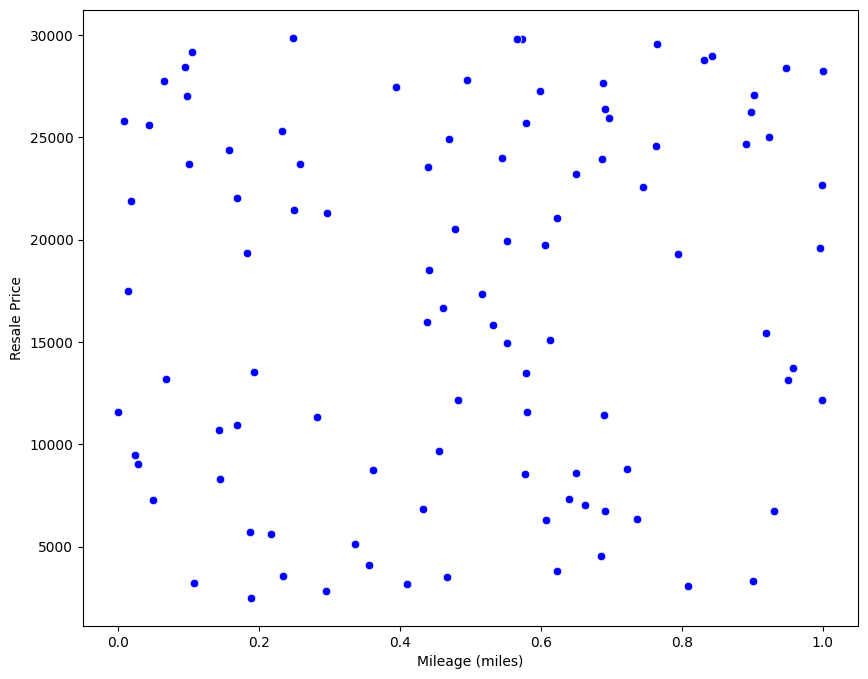

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=data['Mileage (miles)'],y=data['Resale Price'],color="Blue")
plt.title='Price'
plt.xlabel='Mileage'
plt.ylabel='Price'
plt.show()

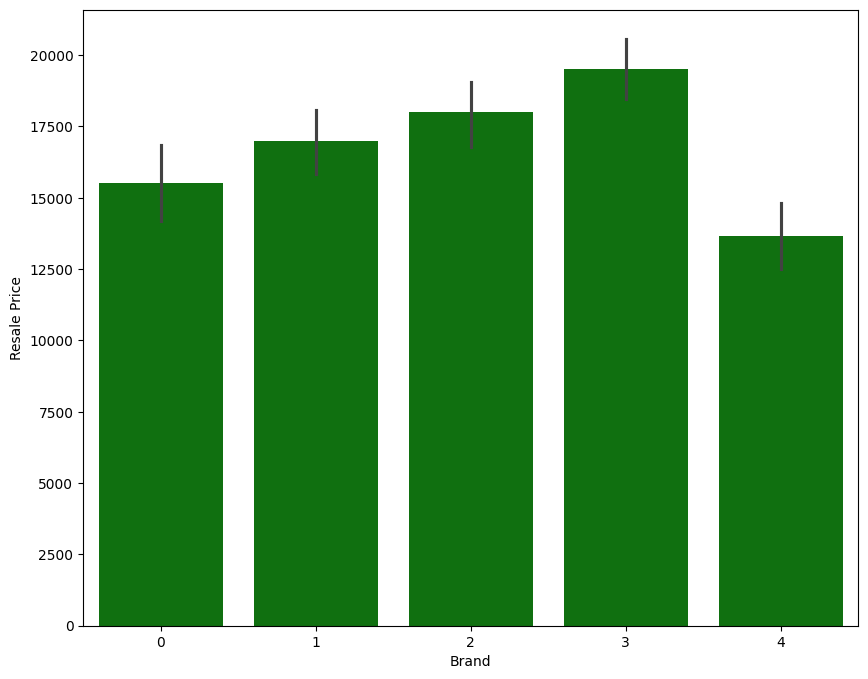

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x=data['Brand'],y=data['Resale Price'],color="Green")
plt.title='Price'
plt.xlabel='Brand'
plt.ylabel='Price'
plt.show()

In [ ]:
x=data.drop('Resale Price',axis=1)
y=data['Resale Price']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
Lin=LinearRegression()
DTR=DecisionTreeRegressor()
RFR=RandomForestRegressor()

In [ ]:
Lin.fit(x_train,y_train)
DTR.fit(x_train,y_train)
RFR.fit(x_train,y_train)

RandomForestRegressor()

In [ ]:
y_pred_Lin=Lin.predict(x_test)
y_pred_DTR=DTR.predict(x_test)
y_pred_RFR=RFR.predict(x_test)

In [ ]:
print("R2-Lin: ",R2(y_test,y_pred_Lin))
print("R2-DTR: ",R2(y_test,y_pred_DTR))
print("R2-RFR: ",R2(y_test,y_pred_RFR))

R2-Lin:  0.02408389484532769
R2-DTR:  1.0
R2-RFR:  0.9994674692271026


In [ ]:
print("MSE-Lin: ",MSE(y_test,y_pred_Lin))
print("MSE-DTR: ",MSE(y_test,y_pred_DTR))
print("MSE-RFR: ",MSE(y_test,y_pred_RFR))

MSE-Lin:  73958359.27137384
MSE-DTR:  0.0
MSE-RFR:  40357.0573505


In [ ]:
print("MAE-Lin: ",MAE(y_test,y_pred_Lin))
print("MAE-DTR: ",MAE(y_test,y_pred_DTR))
print("MAE-RFR: ",MAE(y_test,y_pred_RFR))

MAE-Lin:  7722.679898278405
MAE-DTR:  0.0
MAE-RFR:  53.78055000000002


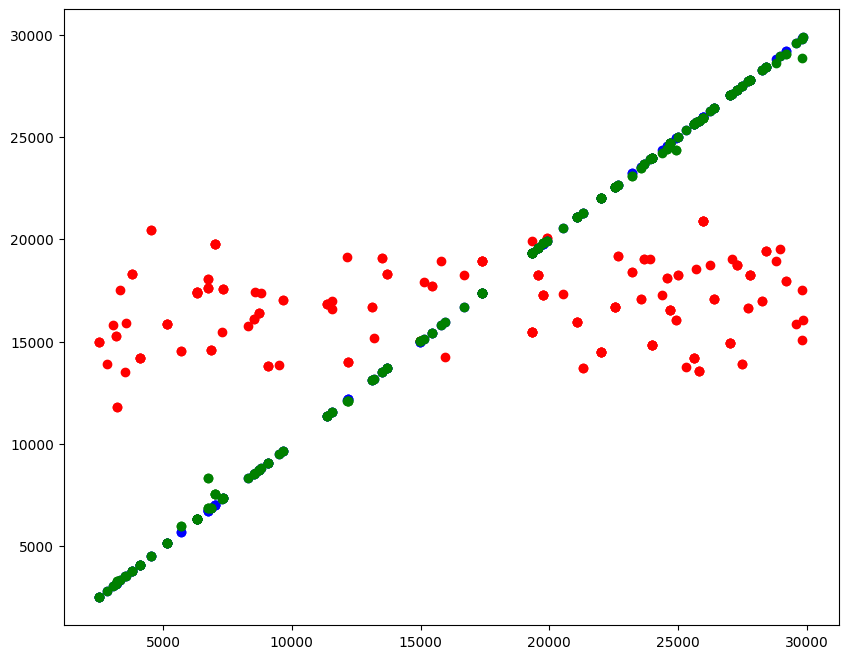

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(y_test,y_pred_Lin,color="Red")
plt.scatter(y_test,y_pred_DTR,color="Blue")
plt.scatter(y_test,y_pred_RFR,color="Green")
plt.title='Result'
plt.xlabel='Actual'
plt.ylabel='Prediction'
plt.show()

In [ ]:
Grid_Prams={'max_depth': [10,20,30,5,15,25,35],'max_leaf_nodes':[5,7,8,10]}
Grid_Model=GridSearchCV(DecisionTreeRegressor(),Grid_Prams,cv=5)
Grid_Model.fit(x_train,y_train)
print(Grid_Model.best_params_)

{'max_depth': 10, 'max_leaf_nodes': 10}


In [ ]:
y_pred_GridModel=Grid_Model.best_estimator_.predict(x_test)

In [ ]:
print("MAE-Gird: ",MAE(y_test,y_pred_GridModel))
print("R2-Grid: ",R2(y_test,y_pred_GridModel))
print("MSE-Grid: ",MSE(y_test,y_pred_GridModel))

MAE-Gird:  4739.141669402711
R2-Grid:  0.48261132898914794
MSE-Grid:  39209535.54454827


In [ ]:
Rand_Prams={'n_estimators':[5,7,8,10],'max_depth': [10,20,30,5,15,25,35]}
Rand_Model=RandomizedSearchCV(RandomForestRegressor(),Rand_Prams,cv=5)
Rand_Model.fit(x_train,y_train)
print(Rand_Model.best_params_)

{'n_estimators': 10, 'max_depth': 20}


In [ ]:
y_pred_RandModel=Rand_Model.best_estimator_.predict(x_test)
print("MAE-Rand: ",MAE(y_test,y_pred_RandModel))
print("R2-Rand: ",R2(y_test,y_pred_RandModel))
print("MSE-Rand: ",MSE(y_test,y_pred_RandModel))

MAE-Rand:  64.6935
R2-Rand:  0.9969408266277338
MSE-Rand:  231834.93145000006


In [ ]:
pip install gradio

In [ ]:
data.columns

Index(['Brand', 'Model Year', 'Mileage (miles)', 'Fuel Type', 'Condition',
       'Transmission', 'Resale Price'],
      dtype='object')

In [ ]:
import gradio as gr
def Predict(Brand,Model_Year, Mileage, Fuel_Type, Condition, Transmission):
  try:
    input_data=pd.DataFrame({
        'Brand':[Brand],
        'Model Year':[Model_Year],
        'Mileage (miles)':[Mileage],
        'Fuel Type':[Fuel_Type],
        'Condition':[Condition],
        'Transmission':[Transmission]
    })
    LabelData=['Brand','Fuel Type','Transmission']
    for En in LabelData:
      input_data[En]=Le[En].transform(input_data[En])
    ScallerData=['Model Year','Mileage (miles)','Condition']
    input_data[ScallerData]=Min.transform(input_data[ScallerData])
    result=Rand_Model.best_estimator_.predict(input_data)
    return f'result: ${result[0]:,.2f}'
  except Exception as e :
    return f'Error {e}'

gr.Interface(
    fn=Predict,
    title='Car Price prediction',
    inputs=[
        gr.Dropdown(choices=['Ford','BMW','Honda','Toyota','Chevrolet'],label='Brand'),
        gr.Number(label='Model_Year'),
        gr.Number(label='Mileage (miles)'),
        gr.Dropdown(choices=['Electric','Diesel','Gasoline'],label='Fuel Type'),
        gr.Number(label='Condition'),
        gr.Dropdown(choices=['Automatic','Manual'],label='Transmission')],
    outputs=gr.Textbox(label='Car Price')
    ).launch(debug=True)

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://d3808dc686acabe0de.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://d3808dc686acabe0de.gradio.live
